In [1]:
#Interactive 3d plot. also need `pip3 install ipympl`
%matplotlib widget

# Non-linear Poission
---
In the previous note, we solve the bilinear weak form of Poission equation by FEM. Now we aim at the non-bilinear case:

$$
\begin{align*}
{}- \nabla\cdot \kappa(u) \nabla &u = f(x,y)\qquad((x,y)\in\Omega),\\
u &= g(x,y)\qquad ((x,y)\in \partial \Omega).
\end{align*}
$$

The key difference is that $\kappa$ now is a function of $u$, thus the LHS $a(u,v)$ is no longer linear w.r.t. $u$. The general idea for such nonlinear problem is iteratively solving a series of linear problem, so that an initial guess $u^0$ gradually approaches the true solution.



In [1]:
# Test case modified from last note.
from femsolver import FEMSolverV1, FEMSolverV2
from scipy.interpolate import LinearNDInterpolator
import sympy as sym
import numpy as np

x, y, u_ = sym.symbols('x y u_')
u = 1 + x**2 + y**2
kappa_u = sym.cos(u_) #now kappa is dependent on u_
kappa_xy = kappa_u.subs(u_, u)
f = - sym.diff(kappa_xy*sym.diff(u, x), x) - sym.diff(kappa_xy*sym.diff(u, y), y)
f = sym.simplify(f)
g = u
print('kappa_xy=',kappa_xy)
print('kappa_u=',kappa_u)
print("f=",f)
print("u_exact=", u)

# convert to numpy funcs
kappa_xy = sym.lambdify([(x, y)], kappa_xy, 'numpy')
kappa_u = sym.lambdify([(u_,)], kappa_u, 'numpy')
f = sym.lambdify([(x, y)], f, 'numpy')
g = sym.lambdify([(x, y)], g, 'numpy')
u_exact = sym.lambdify([(x, y)], u, 'numpy')

kappa_xy= cos(x**2 + y**2 + 1)
kappa_u= cos(u_)
f= 4*x**2*sin(x**2 + y**2 + 1) + 4*y**2*sin(x**2 + y**2 + 1) - 4*cos(x**2 + y**2 + 1)
u_exact= x**2 + y**2 + 1


## Alg1: Picard iteration

Starting from an initial guess $u^0$, iteratively solve the following linear problem w.r.t. $u^{k+1}$, until the error $\epsilon \equiv\left\|u^{k+1}-u^k\right\|<$ tol.
$$
\nabla \cdot\left(q\left(u^k\right) \nabla u^{k+1}\right)=0, \quad k=0,1, \ldots
$$

In [18]:
#Picard iteration

s = FEMSolverV1()
s.setDomain([(-1, -1), (1, -1), (1, 1), (-1, 1)], [(-1, -1), (1, -1), (1, 1), (-1, 1)])


tol = 1e-5
uk = np.random.rand(len(s.nodes),)
max_iter = 25
for it in range(1, 1+max_iter):
    
    def kappa_uk(xvec):
        return kappa_u(LinearNDInterpolator(s.nodes, uk)(xvec))
    
    uk_1 = s.solve(kappa_k, f, g, visualize=False)
    eps = np.linalg.norm(uk - uk_1, ord=np.Inf)
    if eps < tol:
        break
    else:
        uk = uk_1 #update u, go to next iteration.
    
    
    print("iter=", it, "eps=", eps)

iter= 1 eps= 2.9426169408646774
iter= 2 eps= 0.6276852902855199


KeyboardInterrupt: 

Mean Abs Error= 0.2725771888694447


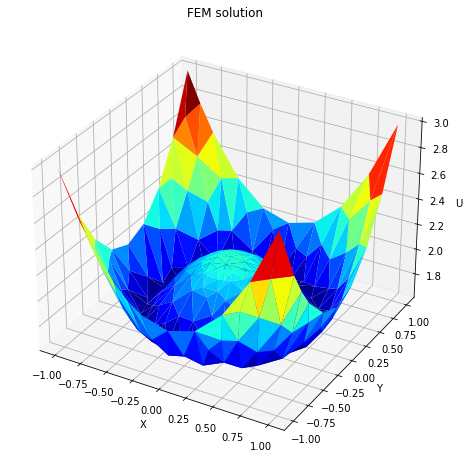

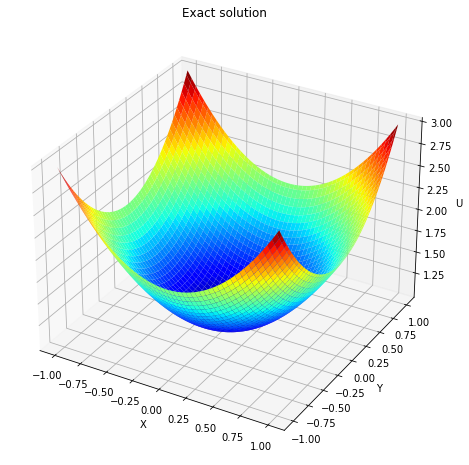

In [11]:
s.visualize(uk, u_exact) #failed? because kappa(u)=cos(u) is symmetric with pi/2

In [3]:
# Another example
x, y, u_ = sym.symbols('x y u_')
u = 1 + x**2 + y**2
kappa_u = -2*(u_) 
kappa_xy = kappa_u.subs(u_, u)
f = - sym.diff(kappa_xy*sym.diff(u, x), x) - sym.diff(kappa_xy*sym.diff(u, y), y)
f = sym.simplify(f)
g = u
print('kappa_xy=',kappa_xy)
print('kappa_u=',kappa_u)
print("f=",f)
print("u_exact=", u)

# convert to numpy funcs
kappa_xy = sym.lambdify([(x, y)], kappa_xy, 'numpy')
kappa_u = sym.lambdify([(u_,)], kappa_u, 'numpy')
f = sym.lambdify([(x, y)], f, 'numpy')
g = sym.lambdify([(x, y)], g, 'numpy')
u_exact = sym.lambdify([(x, y)], u, 'numpy')

kappa_xy= -2*x**2 - 2*y**2 - 2
kappa_u= -2*u_
f= 16*x**2 + 16*y**2 + 8
u_exact= x**2 + y**2 + 1


iter= 1 eps= 2.934334080182994
iter= 2 eps= 26.317504770497802
iter= 3 eps= 28.881418646450793
iter= 4 eps= 3.5180886498069395
iter= 5 eps= 1.9120191192931222
iter= 6 eps= 0.044842677172851175
iter= 7 eps= 0.0028165035116918258
iter= 8 eps= 0.00017464226392083226
iter= 9 eps= 1.7406286163756945e-05
Mean Abs Error= 0.013973151770392317


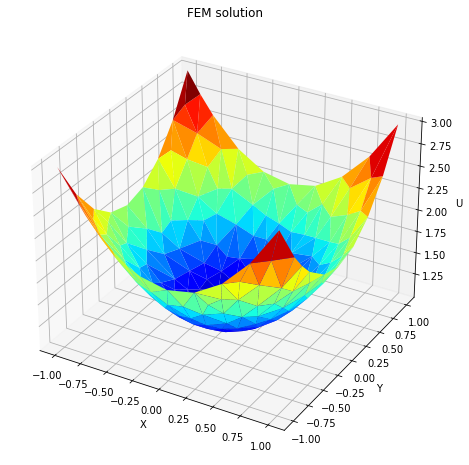

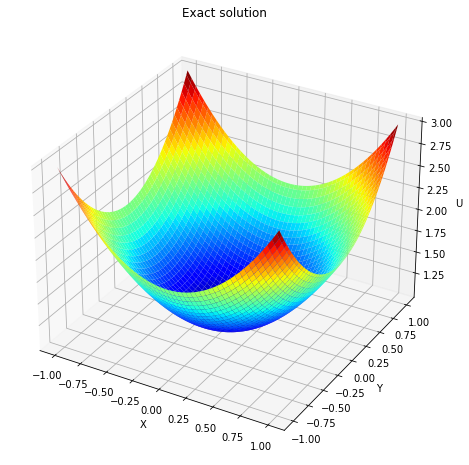

array([3.        , 3.        , 3.        , 3.        , 1.07801156,
       1.07791743, 1.07544705, 1.07790685, 1.0779452 , 1.07556014,
       1.07737753, 1.0791912 , 1.07854984, 1.07803451, 1.07643659,
       1.07785562, 1.077211  , 1.07675084, 1.07714668, 1.07838305,
       1.07650395, 1.07450971, 1.07650535, 1.07661838, 1.07484303,
       1.07820668, 1.07883805, 1.07669904, 1.07698576, 1.07627467,
       1.07832459, 1.07792356, 1.07722851, 1.07729274, 1.16308797,
       1.02551798, 1.12673796, 1.29682577, 1.12489675, 2.        ,
       1.30302498, 2.        , 1.12182567, 1.1260885 , 1.03770669,
       1.04271039, 1.02207951, 1.0250513 , 1.16486864, 1.15846152,
       1.12415484, 1.36401792, 1.16175837, 1.16236641, 1.12782979,
       1.1248504 , 1.16289547, 2.        , 1.12627544, 1.12473372,
       1.16291246, 1.03737098, 1.04386362, 1.04382343, 1.04494424,
       1.02933764, 1.04399745, 1.16035729, 1.04465649, 1.16322639,
       2.        , 1.19769678, 1.19541828, 1.55550461, 1.30078

In [4]:
s = FEMSolverV2()
s.setDomain([(-1, -1), (1, -1), (1, 1), (-1, 1)], [(-1, -1), (1, -1), (1, 1), (-1, 1)])
s.solve_nonlinear_picard(kappa_u, f, g, visualize=True, u_exact=u_exact)